In [ ]:
# This is a series of examples using the icanswim/qchem quantum mechanic machine learning repo
# icanswim/qchem utilizes the icanswim/cosmosis data science machine learning repo

In [1]:
import sys # required for relative imports in jupyter lab
sys.path.insert(0, '../') 

from cosmosis.model import FFNet
from cosmosis.dataset import SKDS
from cosmosis.learning import Learn, Selector

from dataset import QM7, QM7b, QM7X, QM9, ANI1x

from torch.optim import Adam
from torch.nn import MSELoss, L1Loss
from torch.optim.lr_scheduler import ReduceLROnPlateau

RDKit WARNING: [08:00:00] Enabling RDKit 2019.09.3 jupyter extensions


In [ ]:
## Example using scikit dataset wrapper SKDS and custom model
model_params = {'D_in': 128, 
                'H': 512, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'features': ['X'],
                              'targets': ['y'],
                              'features_dtype': 'float32',
                              'targets_dtype': 'float32',
                              'make': 'make_regression',
                              'transform': [],
                              'target_transform': [],
                              'sk_params': {'n_samples': 10000,
                                            'n_features': 128}}}

metrics_params = {'report_interval': 10}

opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7, .15)}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 1}

l = Learn([SKDS], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=MSELoss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          batch_size=256, epochs=20)

In [ ]:
## Example using QM7 dataset and custom model with embeddings
model_params = {'D_in': 23*23+23*32, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel',
                'embed_params': [('atoms',7,32,None,True)]}



metrics_params = {'report_interval': 10}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 1}

opt_params = {'lr': 0.01}

l = Learn([QM7], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          batch_size=256, epochs=20)

In [ ]:
## Example using the QM7b dataset
model_params = {'D_in': 23*23, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'features': ['coulomb'],
                              'targets': ['E'],
                              'in_file': './data/qm7b/qm7b.mat',
                              'flatten': True}}

metrics_params = {'report_interval': 10,
                  'log_plot': False}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 2}

opt_params = {'lr': 0.01}

l = Learn([QM7b], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params, 
          batch_size=256, epochs=20)

In [ ]:
## Find the longest molecule in the QM7X dataset
ds_params = {'train_params': {'features': ['atNUM'],
                              'pad': None,
                              'targets': [],
                              'embeds': [],
                              'selector': ['opt']}}

qm7x = QM7X(**ds_params['train_params'])
l = 0
for i in qm7x.ds_idx:
    s = qm7x[i][0].shape[0]
    if s > l:
        l = s
print('longest molecule length: ', l)

qm7x[1]

In [ ]:
## Example using the QM7X dataset and custom model with embeddings
model_params = {'D_in': 23*23+23*64, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel',
                'embed_params': [('atNUM',9,64,None,True)]}

ds_params = {'train_params': {'features': ['distance'],
                              'pad': 23,
                              'do_not_pad':['eAT'],
                              'targets': ['eAT'],
                              'embeds': ['atNUM'],
                              'selector': ['opt'],
                              'flatten': True}}

metrics_params = {'report_interval': 10}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 2}

opt_params = {'lr': 0.01}

l = Learn([QM7X], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          batch_size=256, epochs=50)

creating QM9 dataset...
molecules scanned:  1
molecules created:  1
molecules scanned:  1001
molecules created:  1001
molecules scanned:  2001
molecules created:  2001
molecules scanned:  3001
molecules created:  3001
molecules scanned:  4001
molecules created:  4001
molecules scanned:  5001
molecules created:  5001
molecules scanned:  6001
molecules created:  6001
molecules scanned:  7001
molecules created:  7001
molecules scanned:  8001
molecules created:  8001
molecules scanned:  9001
molecules created:  9001
total molecules scanned:  10000
total uncharacterized molecules removed:  273
total molecules created:  9727
CDataset created...
FFNet model loaded...
CModel loaded...
running model on gpu...
learning time: 0:00:01.223789
epoch: 0, lr: 0.01
train loss: 337.24074026254505, val loss: 289.6137939453125
learning time: 0:00:11.845256
epoch: 10, lr: 0.01
train loss: 8.203768216646635, val loss: 8.382048988342286
learning time: 0:00:22.486121
epoch: 20, lr: 0.01
train loss: 8.11641172

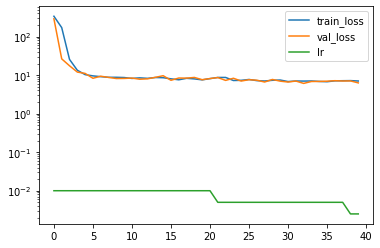

In [3]:
## Example using the QM9 dataset
model_params = {'D_in': 11+29+29*29,
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel',
                #'embed_params': [('hybridization',9,16,0,True),('chirality',9,16,0,True)]
               }

ds_params = {'train_params': {'n': 10000,
                              'db': 'qm9',
                              'n_conformers': 1,
                              'features': ['A','B','C','mu','alpha','homo',
                                           'lumo','gap','r2','zpve','Cv',
                                           'mulliken','coulomb',
                                           #'aromatic','degree','charge','n_hs','n_rads',
                                          ],
                              #'embeds': ['hybridization','chirality'],
                              'targets': ['U0'],
                              'pad': 29,
                              'do_not_pad': ['U0','n_atoms','A','B','C','mu',
                                             'alpha','homo','lumo','gap','r2','zpve','Cv'],
                              #'filter_on': ('n_atoms','>','18'),
                              'use_pickle': False,
                              'flatten': True}}

metrics_params = {'report_interval': 10,
                  'log_plot': True}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 2}

opt_params = {'lr': 0.01}

l = Learn([QM9], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params, 
          batch_size=256, epochs=40, gpu=True)

creating QM9 dataset...
molecules scanned:  1
molecules with no rdkit conformer:  0
molecules created:  1
molecules scanned:  1001
molecules with no rdkit conformer:  15
molecules created:  1001
total molecules scanned:  2000
total molecules with no rdkit conformer:  17
total uncharacterized molecules removed:  53
total molecules created:  1947
CDataset created...
FFNet model loaded...
CModel loaded...
running model on gpu...
learning time: 0:00:03.084195
epoch: 0, lr: 0.01
train loss: 306.216748046875, val loss: 309.9577331542969
test loss: 23.2191219329834
learning time: 0:00:11.385764


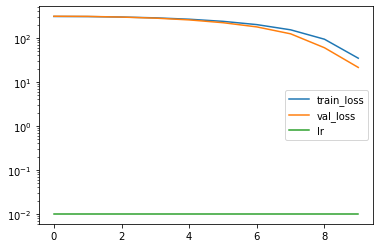

In [2]:
## Example using the QM9 dataset
model_params = {'D_in': 11+29+29*29+29+29+29+29+29+16*29+16*29,
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel',
                'embed_params': [('hybridization',9,16,0,True),('chirality',9,16,0,True)]
               }

ds_params = {'train_params': {'n': 2000,
                              'db': 'both',
                              'n_conformers': 1,
                              'features': ['A','B','C','mu','alpha','homo',
                                           'lumo','gap','r2','zpve','Cv',
                                           'mulliken','coulomb',
                                           'aromatic','degree','charge','n_hs','n_rads',
                                          ],
                              'embeds': ['hybridization','chirality'],
                              'targets': ['U0'],
                              'pad': 29,
                              'do_not_pad': ['U0','n_atoms','A','B','C','mu',
                                             'alpha','homo','lumo','gap','r2','zpve','Cv'],
                              #'filter_on': ('n_atoms','>','18'),
                              'use_pickle': False,
                              'flatten': True}}

metrics_params = {'report_interval': 10,
                  'log_plot': True}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 2}

opt_params = {'lr': 0.01}

l = Learn([QM9], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params, 
          batch_size=256, epochs=10, gpu=True)

In [ ]:
## Example using the QM9 dataset filter
model_params = {'D_in': 17*17+17+12, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {#'n': 10000,
                              'features': ['n_atoms','A','B','C','mu','alpha','homo','lumo', 
                                           'gap','r2','zpve','Cv','mulliken','coulomb'],
                              'embeds': [],
                              'targets': ['U0'],
                              'pad': 17,
                              'do_not_pad': ['n_atoms','A','B','C','mu','alpha','homo','lumo',
                                             'gap','r2','zpve','Cv','U0'],
                              'filter_on': ('n_atoms','<','18'),
                              'use_pickle': False,
                              'flatten': True}}

crit_params = {'reduction': 'sum'}

metrics_params = {'report_interval': 10,
                  'log_plot': True}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 2}

opt_params = {'lr': 0.01}

l = Learn([QM9], FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          batch_size=256, epochs=30)

In [ ]:
## Example using ANI1x dataset with filter and embeddings with a custom model
model_params = {'D_in': 63*63+63*32, 
                'H': 8192, 
                'D_out': 1, 
                'model_name': 'funnel',
                'embed_params': [('atomic_numbers',9,32,None,True)]}

ds_params = {'train_params': {'features': ['distance'],
                              'targets': ['wb97x_dz.energy'],
                              'embeds': ['atomic_numbers'],
                              'pad': 63, #length of the longest molecule in the dataset
                              'flatten': True,
                              'criterion': ['wb97x_dz.energy'],
                              'conformation': 'max',
                              'in_file': './data/ani1x/ani1x-release.h5'}}

metrics_params = {'report_interval': 20}

crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}
sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 5}
opt_params = {'lr': 0.01}

l = Learn([ANI1x], FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          batch_size=128, epochs=50)